# Q3 Visual story telling part 1: green buildings

## Evaluation of Green Buildings and Rent Premium

In [30]:
import pandas as pd

# Load the dataset
data = pd.read_csv('greenbuildings.csv')

# Calculate median rent for green and non-green buildings
median_rent_green = data[data['green_rating'] == 1]['Rent'].median()
median_rent_non_green = data[data['green_rating'] == 0]['Rent'].median()

# Output the results
print(f"Median Rent for Green Buildings: ${median_rent_green:.2f} per square foot per year")
print(f"Median Rent for Non-Green Buildings: ${median_rent_non_green:.2f} per square foot per year")
print(f"Rent Premium for Green Buildings: ${median_rent_green - median_rent_non_green:.2f} per square foot per year")


Median Rent for Green Buildings: $27.60 per square foot per year
Median Rent for Non-Green Buildings: $25.00 per square foot per year
Rent Premium for Green Buildings: $2.60 per square foot per year


The dataset contains 7,894 commercial rental properties across the United States, with 685 of them being green-certified. The initial exploration of the dataset provided an overview of the key variables, such as rent, green certification status, building class, location, and more.

- Median Rent for Green Buildings is 27.60 dollars per square foot per year- 
Median Rent for Non-Green Building is $25.0 dollarsr square foot per yea

T
The analysis confirmed that green-certified buildings command a rent premium of $2.60 per square foot per year.


## Assess Existing Analysis

In [34]:
# Exclude buildings with leasing rate less than 10%
filtered_data = data[data['leasing_rate'] >= 10]

# Calculate median rent for green and non-green buildings after exclusion
median_rent_green_filtered = filtered_data[filtered_data['green_rating'] == 1]['Rent'].median()
median_rent_non_green_filtered = filtered_data[filtered_data['green_rating'] == 0]['Rent'].median()

# Output the results
print("Before Excluding Low-Occupancy Buildings:")
print(f"Median Rent for Green Buildings: ${median_rent_green:.2f} per square foot per year")
print(f"Median Rent for Non-Green Buildings: ${median_rent_non_green:.2f} per square foot per year")
print(f"Rent Premium for Green Buildings: ${median_rent_green - median_rent_non_green:.2f} per square foot per year")

print("\nAfter Excluding Low-Occupancy Buildings:")
print(f"Median Rent for Green Buildings: ${median_rent_green_filtered:.2f} per square foot per year")
print(f"Median Rent for Non-Green Buildings: ${median_rent_non_green_filtered:.2f} per square foot per year")
print(f"Rent Premium for Green Buildings: ${median_rent_green_filtered - median_rent_non_green_filtered:.2f} per square foot per year")

# Assess rent premium consistency across different building sizes and classes
size_bins = pd.cut(data['size'], bins=[0, 50000, 100000, 250000, 500000, 1000000])
class_a_median = data[data['class_a'] == 1].groupby(['green_rating'])['Rent'].median()
class_b_median = data[data['class_b'] == 1].groupby(['green_rating'])['Rent'].median()
class_c_median = data[(data['class_a'] == 0) & (data['class_b'] == 0)].groupby(['green_rating'])['Rent'].median()

print("\nRent Premium Across Building Sizes:")
for bin_range, group in data.groupby(size_bins):
    median_green = group[group['green_rating'] == 1]['Rent'].median()
    median_non_green = group[group['green_rating'] == 0]['Rent'].median()
    premium = median_green - median_non_green
    print(f"Size Range {bin_range}: Rent Premium = ${premium:.2f}")

print("\nRent Premium Across Building Classes:")
print(f"Class A Rent Premium: ${class_a_median[1] - class_a_median[0]:.2f}")
print(f"Class B Rent Premium: ${class_b_median[1] - class_b_median[0]:.2f}")
print(f"Class C Rent Premium: ${class_c_median[1] - class_c_median[0]:.2f}")

Before Excluding Low-Occupancy Buildings:
Median Rent for Green Buildings: $27.60 per square foot per year
Median Rent for Non-Green Buildings: $25.00 per square foot per year
Rent Premium for Green Buildings: $2.60 per square foot per year

After Excluding Low-Occupancy Buildings:
Median Rent for Green Buildings: $27.60 per square foot per year
Median Rent for Non-Green Buildings: $25.03 per square foot per year
Rent Premium for Green Buildings: $2.57 per square foot per year

Rent Premium Across Building Sizes:
Size Range (0, 50000]: Rent Premium = $3.60
Size Range (50000, 100000]: Rent Premium = $3.80
Size Range (100000, 250000]: Rent Premium = $1.80
Size Range (250000, 500000]: Rent Premium = $2.00
Size Range (500000, 1000000]: Rent Premium = $1.14

Rent Premium Across Building Classes:
Class A Rent Premium: $0.24
Class B Rent Premium: $1.10
Class C Rent Premium: $9.94


C:\Users\15126\AppData\Local\Temp\ipykernel_1900\3622794062.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for bin_range, group in data.groupby(size_bins):


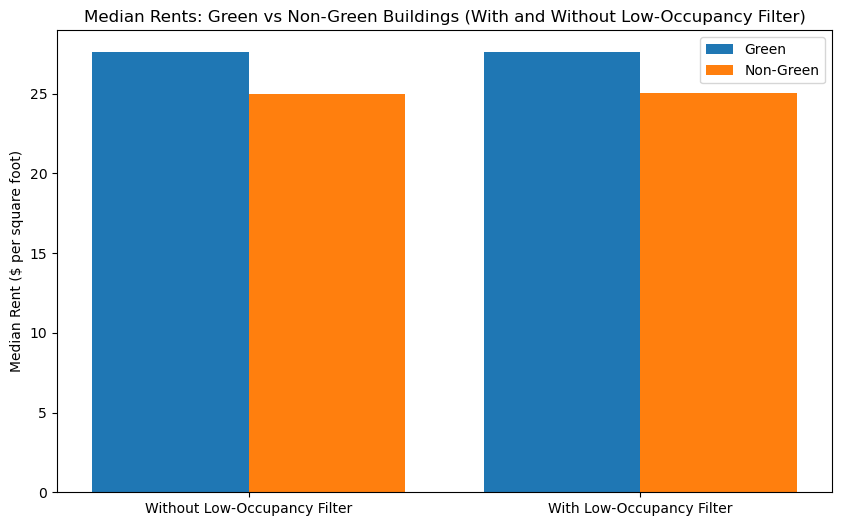

In [36]:
# Calculate median rents for green and non-green buildings before and after filtering out low-occupancy buildings
median_rent_green = data[data['green_rating'] == 1]['Rent'].median()
median_rent_non_green = data[data['green_rating'] == 0]['Rent'].median()

# Exclude buildings with leasing rate less than 10%
filtered_data = data[data['leasing_rate'] >= 10]
median_rent_green_filtered = filtered_data[filtered_data['green_rating'] == 1]['Rent'].median()
median_rent_non_green_filtered = filtered_data[filtered_data['green_rating'] == 0]['Rent'].median()

# Create a dictionary to hold the median rents
median_rents = {
    'Green': [median_rent_green, median_rent_green_filtered],
    'Non-Green': [median_rent_non_green, median_rent_non_green_filtered]
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
labels = ['Without Low-Occupancy Filter', 'With Low-Occupancy Filter']
x = range(len(labels))

ax.bar([p - 0.2 for p in x], median_rents['Green'], width=0.4, label='Green')
ax.bar([p + 0.2 for p in x], median_rents['Non-Green'], width=0.4, label='Non-Green')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Median Rent ($ per square foot)')
ax.set_title('Median Rents: Green vs Non-Green Buildings (With and Without Low-Occupancy Filter)')
ax.legend()
plt.show()


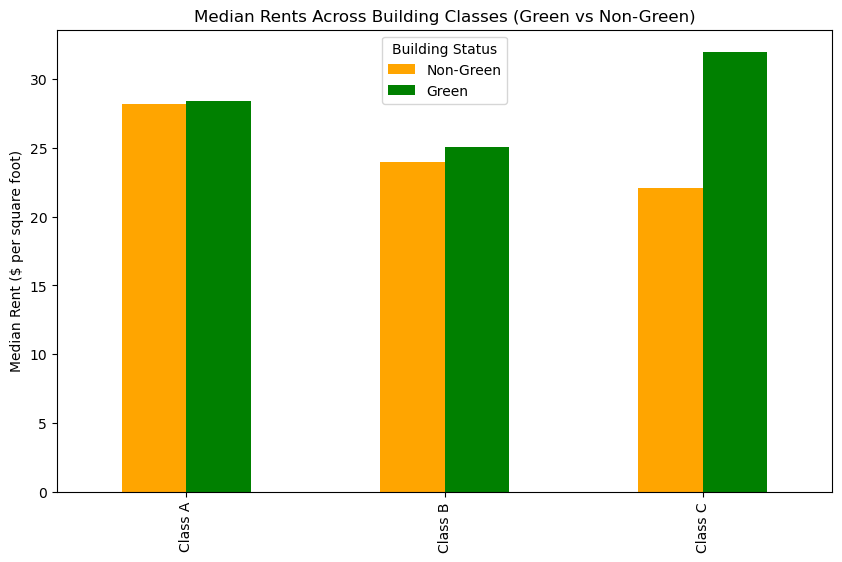

In [38]:
# Recalculate the median rents for each class and for green vs. non-green buildings
class_a_rents = data[data['class_a'] == 1].groupby(['green_rating'])['Rent'].median()
class_b_rents = data[data['class_b'] == 1].groupby(['green_rating'])['Rent'].median()
class_c_rents = data[(data['class_a'] == 0) & (data['class_b'] == 0)].groupby(['green_rating'])['Rent'].median()

# Create a DataFrame for easier plotting
rent_data = pd.DataFrame({
    'Non-Green': [class_a_rents[0], class_b_rents[0], class_c_rents[0]],
    'Green': [class_a_rents[1], class_b_rents[1], class_c_rents[1]]
}, index=['Class A', 'Class B', 'Class C'])

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
rent_data.plot(kind='bar', ax=ax, color=['orange', 'green'])

ax.set_ylabel('Median Rent ($ per square foot)')
ax.set_title('Median Rents Across Building Classes (Green vs Non-Green)')
ax.legend(title='Building Status')
plt.show()

The analysis confirms that green-certified buildings command a rent premium of 2.60 per square foot per year, which remains consistent even after excluding low-occupancy buildings, with a slight decrease to 2.57. The rent premium varies across building sizes, with smaller buildings (under 100,000 square feet) seeing a higher premium of 3.60-3.80, while larger buildings see a lower premium, ranging from 1.14 to 2.00.

Across building classes, Class C buildings experience the highest rent premium at 9.94, significantly higher than Class B (1.10) and Class A (0.24). This suggests that green certification has the most substantial impact on rent for smaller and lower-class buildings. Additionally, the analysis across all classes shows that green-certified buildings consistently command higher rents compared to their non-certified counterparts, further reinforcing the value added by green certification across various property types.

## Step 3: Identify and Address Potential Confounding Variables

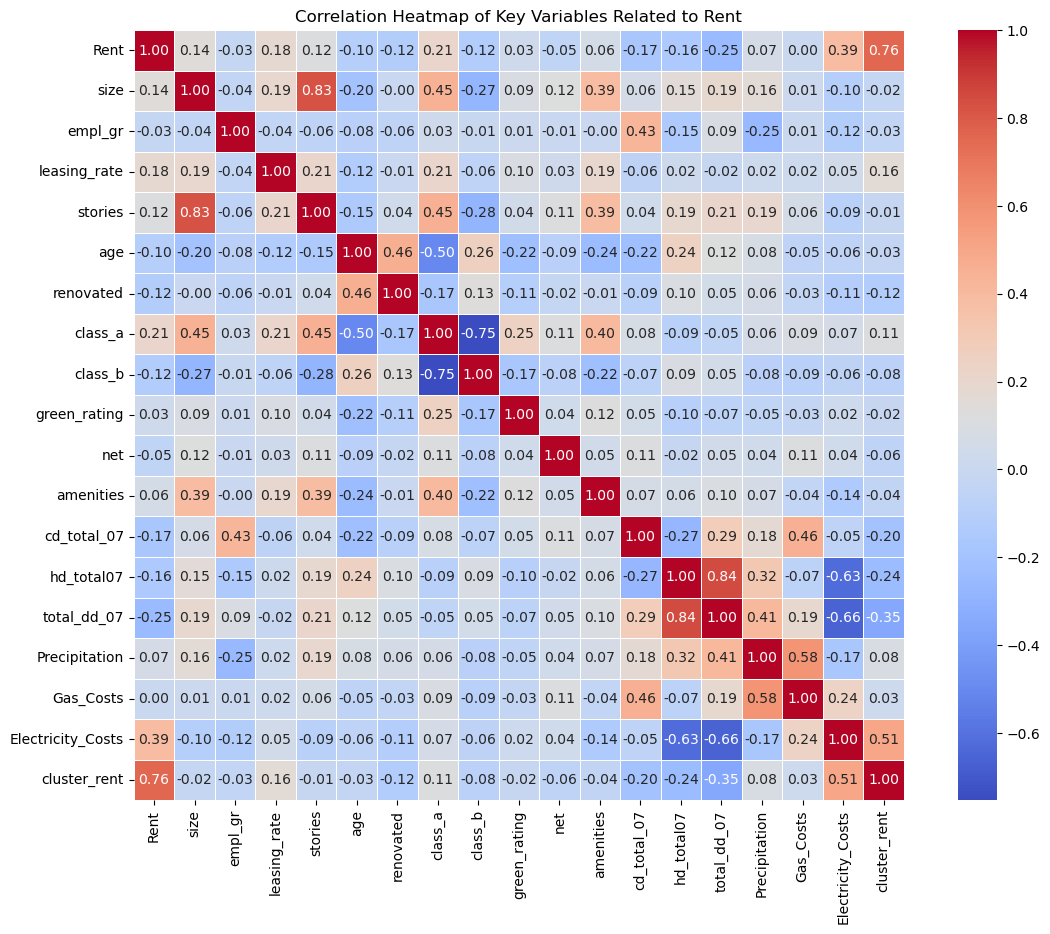

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Select relevant numeric variables for the heatmap
numeric_columns = [
    'Rent', 'size', 'empl_gr', 'leasing_rate', 'stories', 'age', 'renovated',
    'class_a', 'class_b', 'green_rating', 'net', 'amenities', 'cd_total_07',
    'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs', 'Electricity_Costs',
    'cluster_rent'
]

# Calculate the correlation matrix
corr_matrix = data[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Key Variables Related to Rent')

# Show the plot
plt.show()

### A Brief Analysis of Possible Confounding Variables

Top Correlations with Rent:
- Cluster Rent: 0.76. This is the strongest correlation, indicating that the average rent in the local market (cluster) is highly predictive of the rent for individual buildings within that cluster.
- Electricity Costs: 0.39. Higher electricity costs in the building's region are moderately correlated with higher rents, suggesting that tenants may be willing to pay more in areas with higher energy costs, possibly due to energy-efficient building designs.
- Class A: 0.21. Being classified as a Class A building is positively correlated with higher rents, as expected for higher-quality properties.
- Leasing Rate (leasing_rate): 0.18. A higher occupancy rate (more space leased) is associated with higher rents.
- Size: 0.14. Larger buildings tend to command higher rents, although this correlation is relatively weak.

Top Correlations with Green Rating:
- Class A: 0.25. Green certification is more common in Class A buildings, which are generally higher quality and newer.
- Amenities: 0.12. Buildings with amenities are more likely to be green-certified, indicating a possible association between the quality of the building and green certification.
- Leasing Rate: 0.10. Green-certified buildings tend to have slightly higher occupancy rates.
- Size: 0.09. Larger buildings are more likely to be green-certified, though the correlation is weak.
- Cooling Degree Days: 0.05. Buildings in regions with higher cooling demands (cooling degree days) show a slight positive correlation with green certification, possibly due to the energy efficiency of green buildings.

### Final Statement
The analysis confirms a $2.60 rent premium for green-certified buildings, though this premium is strongly influenced by local market conditions (cluster_rent), which are the most significant predictors of rent levels. Higher electricity costs also correlate with increased rents, indicating that tenants may place a premium on energy efficiency, which is often a feature of green-certified buildings. Interestingly, the rent premium is particularly pronounced for Class C buildings, suggesting that green certification could provide substantial economic benefits even in lower-class properties. As such, the decision to invest in green certification should be tailored to the specific building class and market context, recognizing that Class C properties, despite their lower baseline rents, may derive significant value from certification.

Green-certified buildings generally command higher rents, with the rent premium particularly significant in Class C properties. This suggests that even in less desirable markets, green certification can offer substantial value. However, the economic benefit depends on factors like building class, location, and amenities, so these should be carefully considered when evaluating the value of green certification.